In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [27]:
data = pd.read_csv("met_data.csv")

In [28]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Soil Temp @ 50cm (°C),Sunshine Hours,Evaporation (mm)
0,2014-01-01,NaN,34.0,23.0,28.5,30.50,7.20,4.00
1,2014-01-02,NaN,35.0,24.0,29.5,30.00,6.60,4.00
2,2014-01-03,NaN,32.0,23.0,27.5,30.50,7.20,6.00
3,2014-01-04,NaN,33.0,21.0,27.0,30.50,6.10,4.00
4,2014-01-05,NaN,31.5,22.0,26.8,30.50,7.30,4.00
...,...,...,...,...,...,...,...,...
3647,2023-12-27,NaN,30.0,21.0,25.5,NaN,4.20,3.40
3648,2023-12-28,NaN,31.0,22.0,26.5,NaN,5.50,4.10
3649,2023-12-29,NaN,32.0,22.0,27.0,NaN,5.70,3.80
3650,2023-12-30,NaN,32.0,21.0,26.5,NaN,4.10,3.20


In [29]:
if 'DATE' in data.columns:
    data['DATE'] = pd.to_datetime(data['DATE'], format="%Y-%m-%d")


In [30]:
if 'DATE' in data.columns:
    data['year'] = data['DATE'].dt.year
    data['month'] = data['DATE'].dt.month
    data['day'] = data['DATE'].dt.day

In [31]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Soil Temp @ 50cm (°C),Sunshine Hours,Evaporation (mm),year,month,day
0,2014-01-01,NaN,34.0,23.0,28.5,30.50,7.20,4.00,2014,1,1
1,2014-01-02,NaN,35.0,24.0,29.5,30.00,6.60,4.00,2014,1,2
2,2014-01-03,NaN,32.0,23.0,27.5,30.50,7.20,6.00,2014,1,3
3,2014-01-04,NaN,33.0,21.0,27.0,30.50,6.10,4.00,2014,1,4
4,2014-01-05,NaN,31.5,22.0,26.8,30.50,7.30,4.00,2014,1,5
...,...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,NaN,30.0,21.0,25.5,NaN,4.20,3.40,2023,12,27
3648,2023-12-28,NaN,31.0,22.0,26.5,NaN,5.50,4.10,2023,12,28
3649,2023-12-29,NaN,32.0,22.0,27.0,NaN,5.70,3.80,2023,12,29
3650,2023-12-30,NaN,32.0,21.0,26.5,NaN,4.10,3.20,2023,12,30


<Axes: xlabel='DATE'>

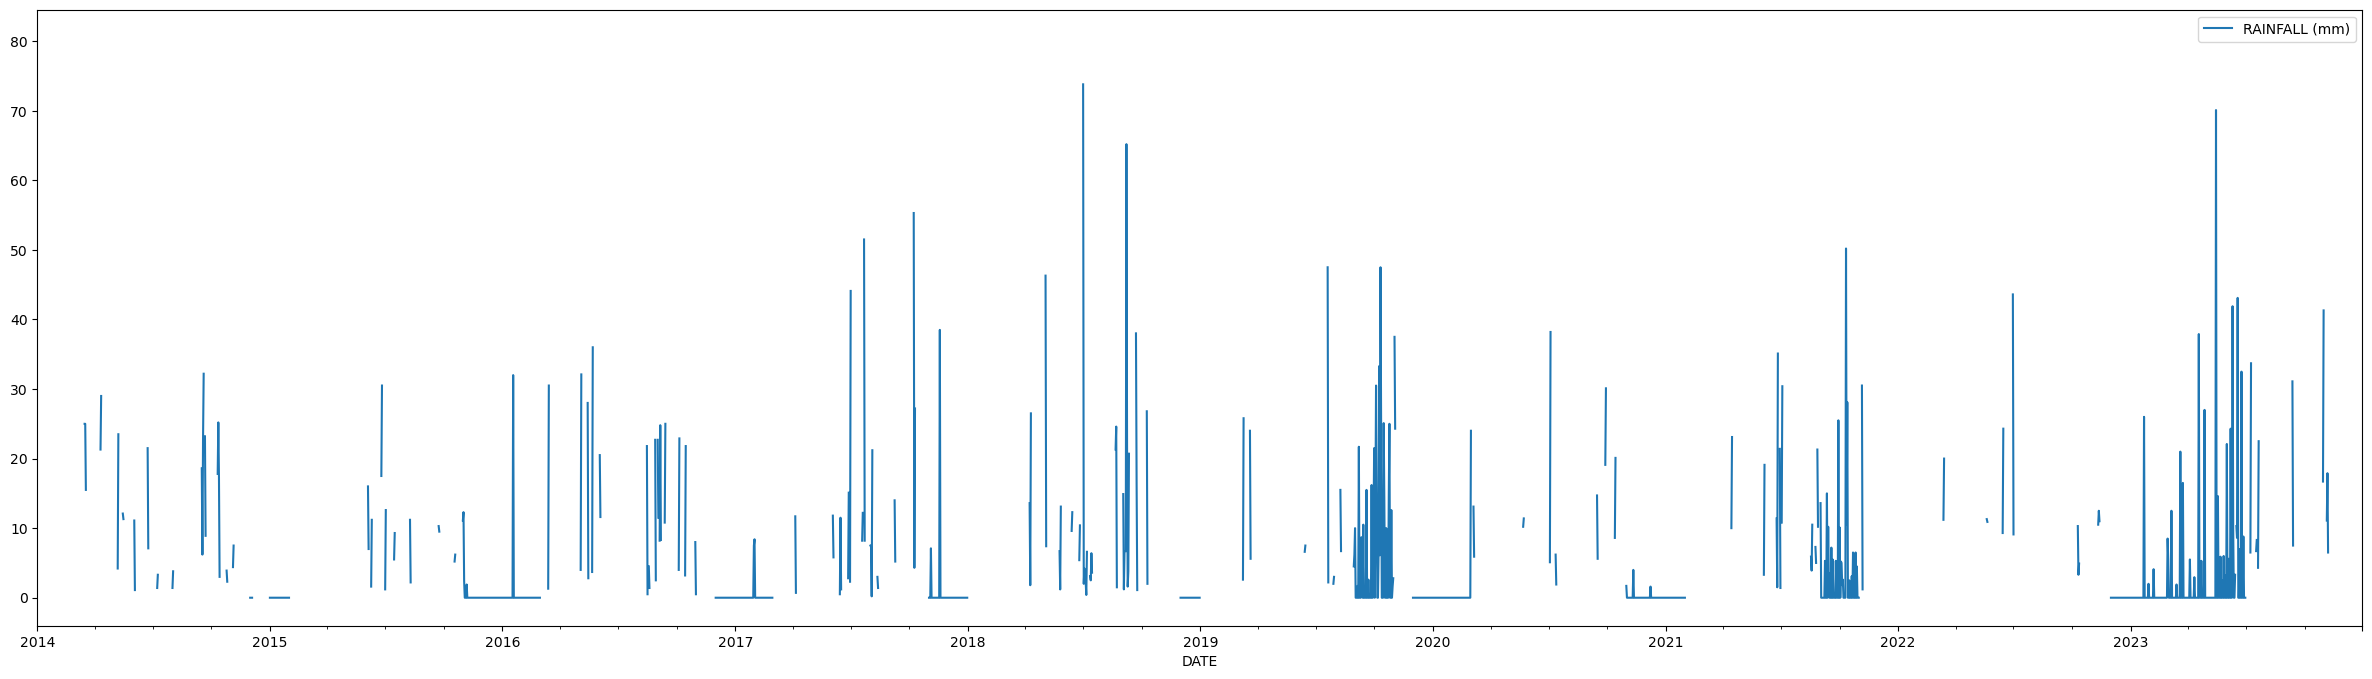

In [32]:
data['RAINFALL (mm)'] = pd.to_numeric(data['RAINFALL (mm)'], errors='coerce')
data.plot(x='DATE', y='RAINFALL (mm)', figsize=(30,8))


<Axes: xlabel='DATE'>

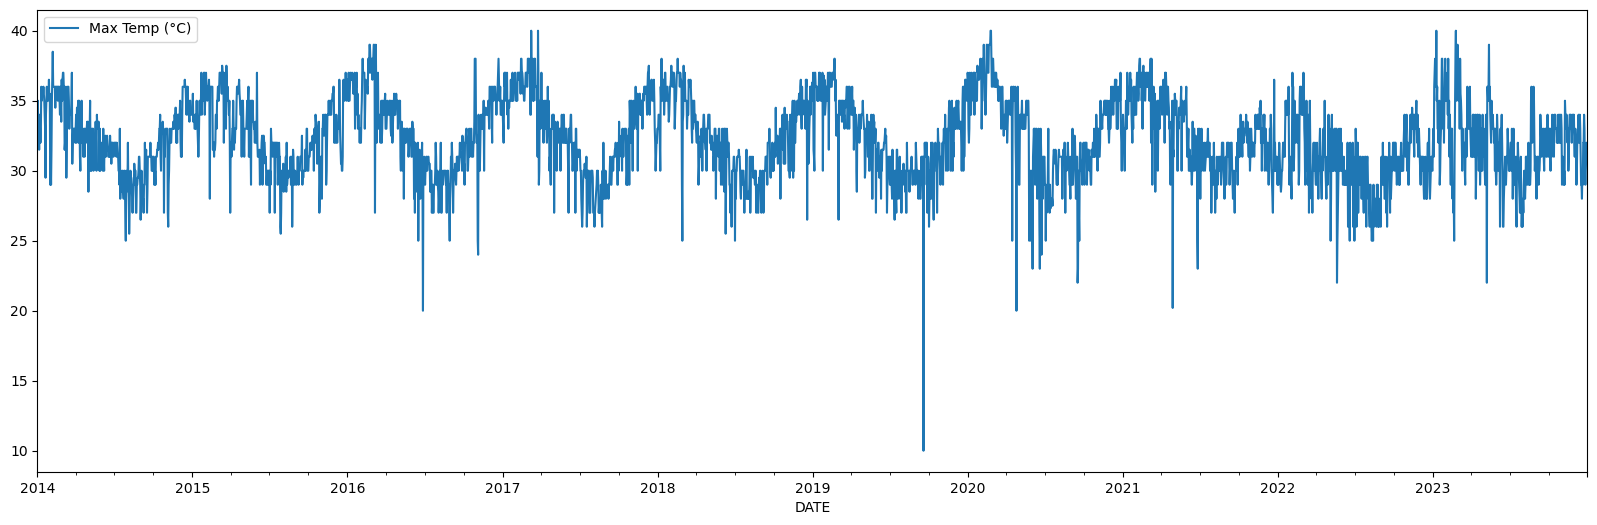

In [33]:
data['Max Temp (°C)'] = pd.to_numeric(data['Max Temp (°C)'], errors='coerce')
data.plot(x='DATE', y='Max Temp (°C)', figsize=(20,6))

<Axes: xlabel='DATE'>

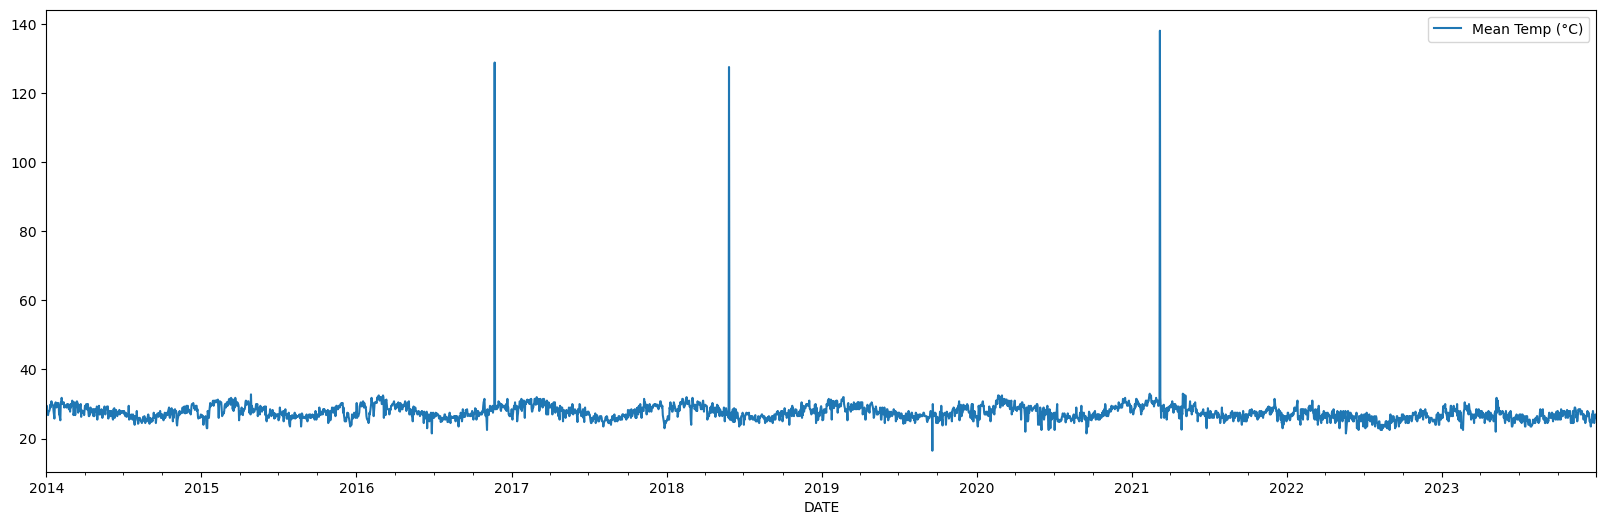

In [34]:
data['Mean Temp (°C)'] = pd.to_numeric(data['Mean Temp (°C)'], errors='coerce')
data.plot(x='DATE', y='Mean Temp (°C)', figsize=(20,6))

<Axes: xlabel='DATE'>

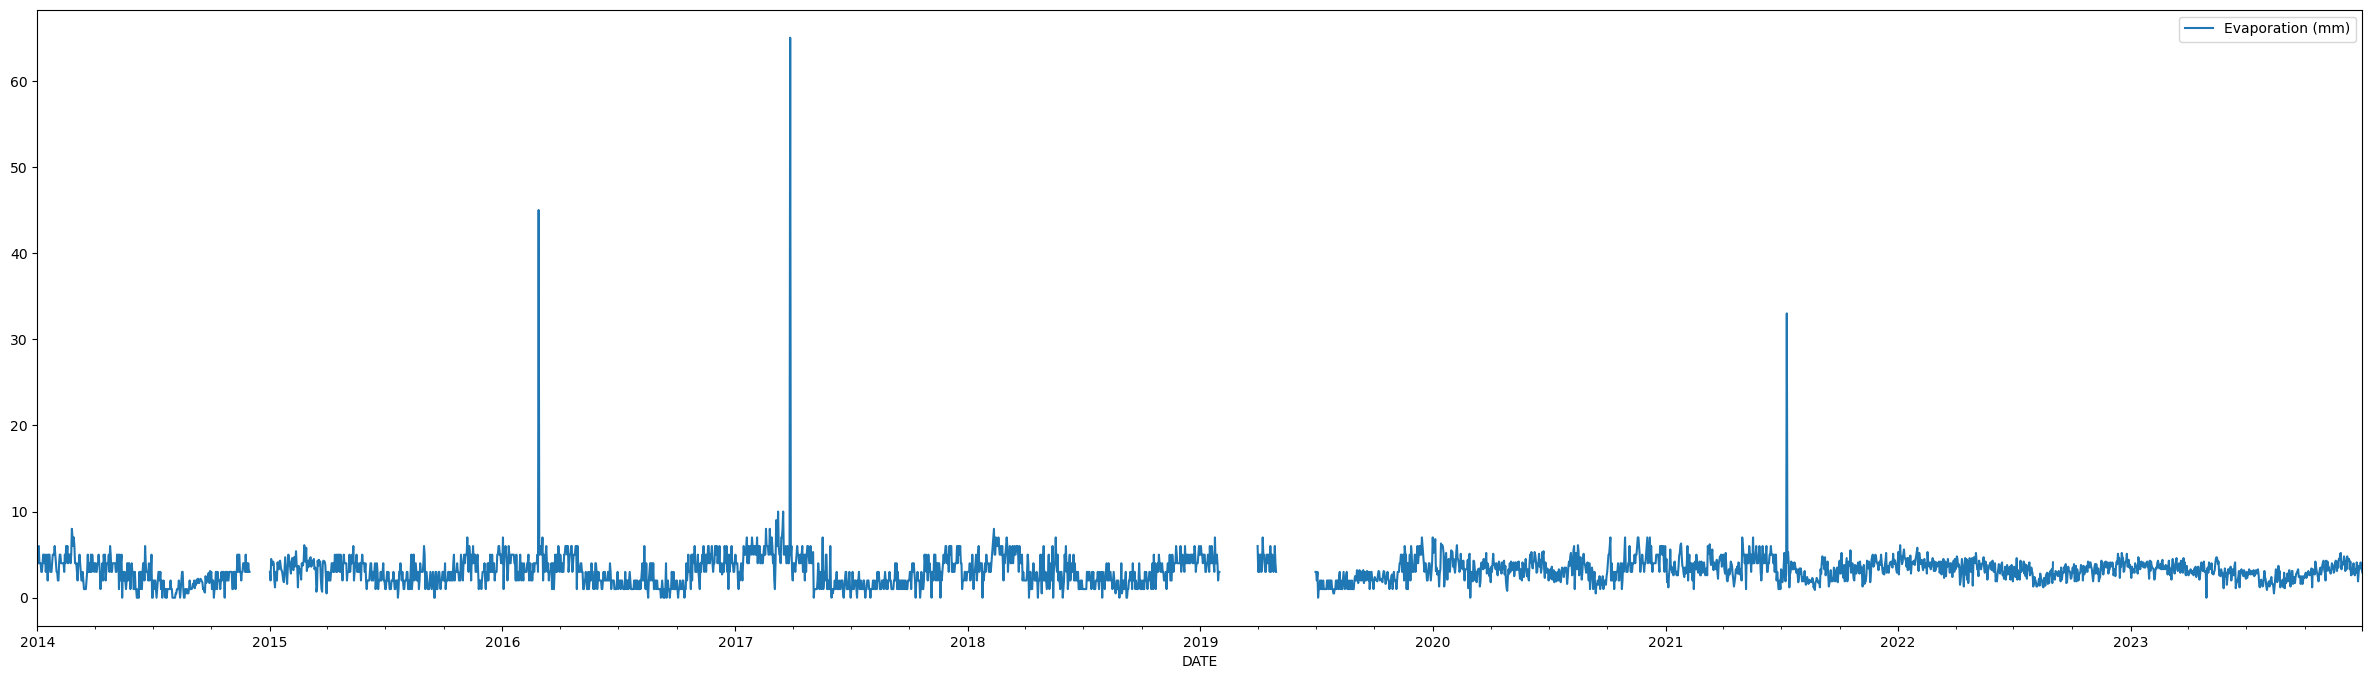

In [35]:
data['Evaporation (mm)'] = pd.to_numeric(data['Evaporation (mm)'], errors='coerce')
data.plot(x='DATE', y='Evaporation (mm)', figsize=(30,8))

In [36]:
#check data shape
(data.shape)

(3652, 11)

In [37]:
(data.columns)



Index(['DATE', 'RAINFALL (mm)', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Soil Temp @ 50cm (°C) ', 'Sunshine Hours',
       'Evaporation (mm)', 'year', 'month', 'day'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    3652 non-null   datetime64[ns]
 1   RAINFALL (mm)           1512 non-null   float64       
 2   Max Temp (°C)           3652 non-null   float64       
 3   Min Temp (°C)           3652 non-null   float64       
 4   Mean Temp (°C)          3652 non-null   float64       
 5   Soil Temp @ 50cm (°C)   2191 non-null   object        
 6   Sunshine Hours          3652 non-null   object        
 7   Evaporation (mm)        3500 non-null   float64       
 8   year                    3652 non-null   int32         
 9   month                   3652 non-null   int32         
 10  day                     3652 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), object(2)
memory usage: 271.2+ KB


In [39]:
#replaced missing values with 0 in RAINFALL (mm) column 
data['RAINFALL (mm)'] = data['RAINFALL (mm)'].fillna(0)

In [40]:
#check missing values
data.isna().sum()

DATE                         0
RAINFALL (mm)                0
Max Temp (°C)                0
Min Temp (°C)                0
Mean Temp (°C)               0
Soil Temp @ 50cm (°C)     1461
Sunshine Hours               0
Evaporation (mm)           152
year                         0
month                        0
day                          0
dtype: int64

In [51]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [42]:
#droppped this column for having more than 50% as missing values
data = data.drop('Soil Temp @ 50cm (°C) ', axis=1)


In [43]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Sunshine Hours,Evaporation (mm),year,month,day
0,2014-01-01,0.0,34.0,23.0,28.5,7.20,4.0,2014,1,1
1,2014-01-02,0.0,35.0,24.0,29.5,6.60,4.0,2014,1,2
2,2014-01-03,0.0,32.0,23.0,27.5,7.20,6.0,2014,1,3
3,2014-01-04,0.0,33.0,21.0,27.0,6.10,4.0,2014,1,4
4,2014-01-05,0.0,31.5,22.0,26.8,7.30,4.0,2014,1,5
...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,0.0,30.0,21.0,25.5,4.20,3.4,2023,12,27
3648,2023-12-28,0.0,31.0,22.0,26.5,5.50,4.1,2023,12,28
3649,2023-12-29,0.0,32.0,22.0,27.0,5.70,3.8,2023,12,29
3650,2023-12-30,0.0,32.0,21.0,26.5,4.10,3.2,2023,12,30


In [44]:
# Calculate the median value for each month
median_per_month = data.groupby('month')['Evaporation (mm)'].median()

# Iterate over the rows of the dataframe
for index, row in data.iterrows():
    # Check if the value is missing
    if pd.isnull(row['Evaporation (mm)']):
        # Get the month of the current row
        month = row['month']
        # Fill in the missing value with the median value for that month
        data.at[index, 'Evaporation (mm)'] = median_per_month[month]

In [45]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Sunshine Hours,Evaporation (mm),year,month,day
0,2014-01-01,0.0,34.0,23.0,28.5,7.20,4.0,2014,1,1
1,2014-01-02,0.0,35.0,24.0,29.5,6.60,4.0,2014,1,2
2,2014-01-03,0.0,32.0,23.0,27.5,7.20,6.0,2014,1,3
3,2014-01-04,0.0,33.0,21.0,27.0,6.10,4.0,2014,1,4
4,2014-01-05,0.0,31.5,22.0,26.8,7.30,4.0,2014,1,5
...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,0.0,30.0,21.0,25.5,4.20,3.4,2023,12,27
3648,2023-12-28,0.0,31.0,22.0,26.5,5.50,4.1,2023,12,28
3649,2023-12-29,0.0,32.0,22.0,27.0,5.70,3.8,2023,12,29
3650,2023-12-30,0.0,32.0,21.0,26.5,4.10,3.2,2023,12,30


In [46]:
#rechecked for missing values correctly dealt with
data.isna().sum()

DATE                0
RAINFALL (mm)       0
Max Temp (°C)       0
Min Temp (°C)       0
Mean Temp (°C)      0
Sunshine Hours      0
Evaporation (mm)    0
year                0
month               0
day                 0
dtype: int64

<Axes: xlabel='DATE'>

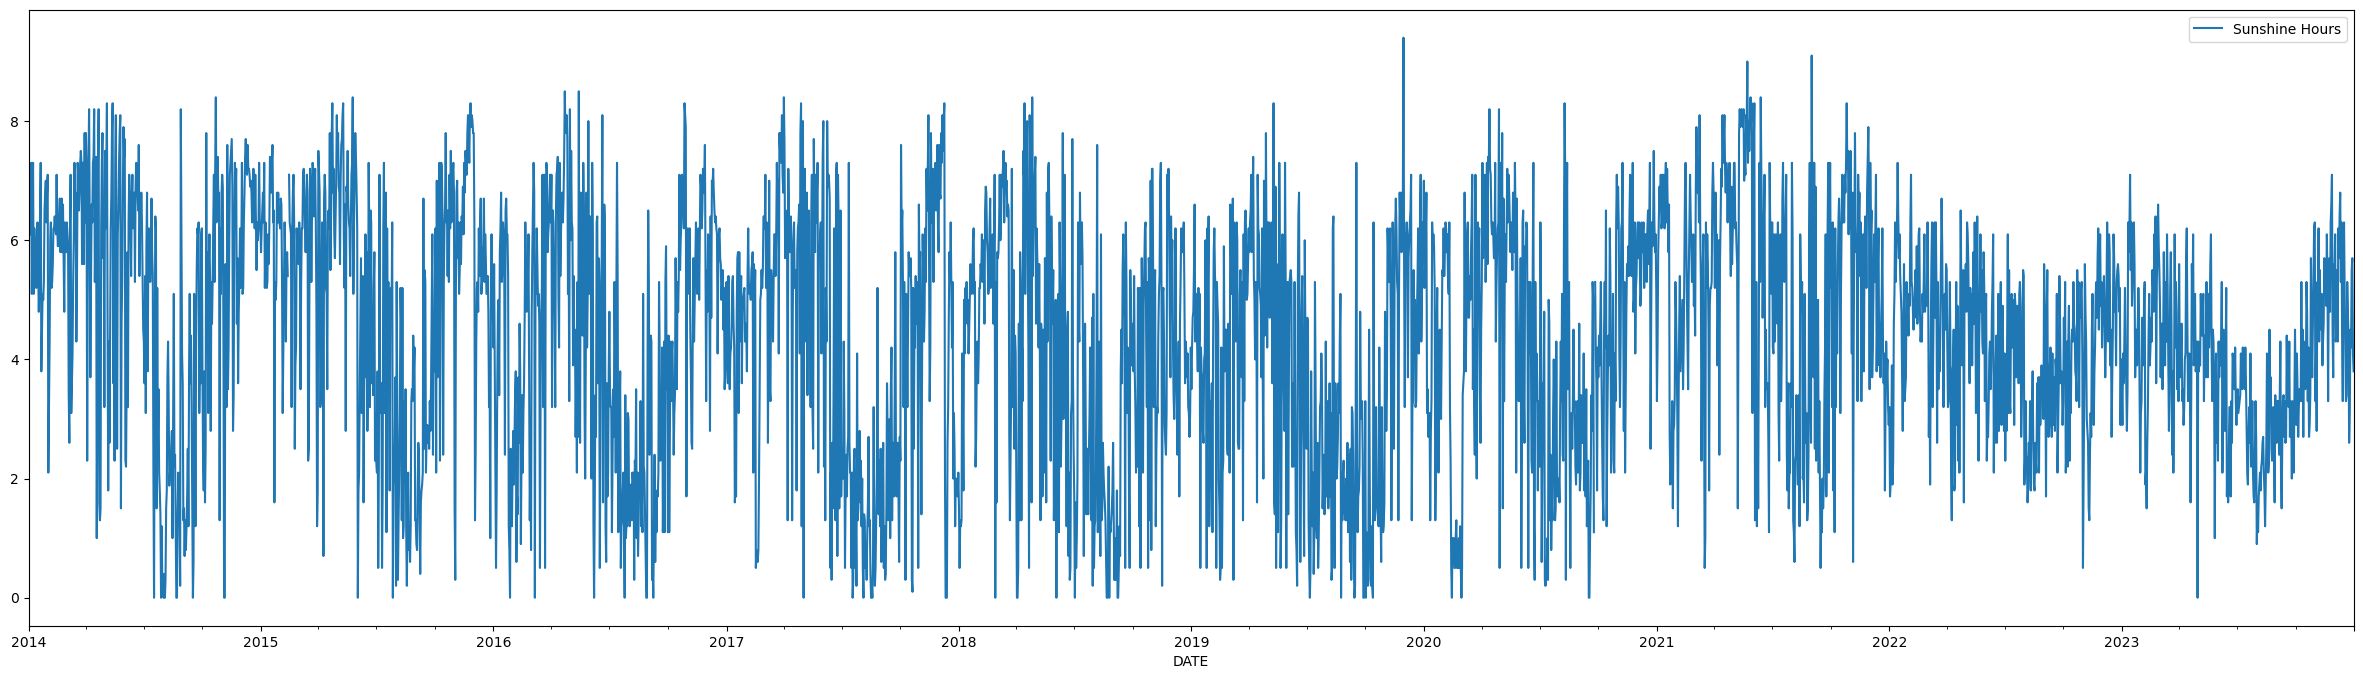

In [47]:
data['Sunshine Hours'] = pd.to_numeric(data['Sunshine Hours'], errors='coerce')
data.plot(x='DATE', y='Sunshine Hours', figsize=(30,8))

Seasonality and Trends

c:\Users\Kent\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kent\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kent\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kent\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

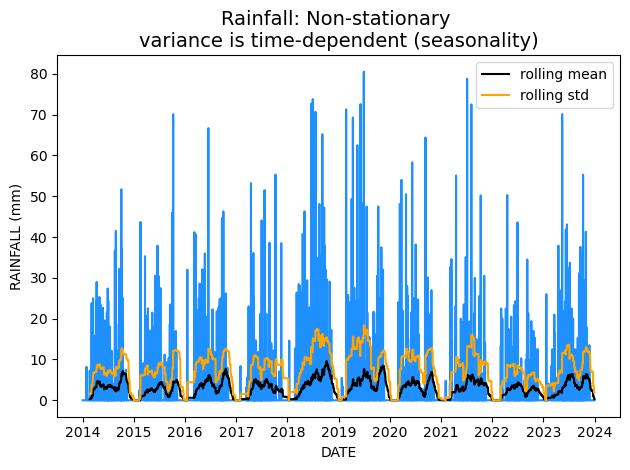

In [48]:
#plot series to check for trends and seasonality
rolling_window = 52
sns.lineplot(x=data['DATE'], y=data['RAINFALL (mm)'], color='dodgerblue')
sns.lineplot(x=data['DATE'], y=data['RAINFALL (mm)'].rolling(rolling_window).mean(), color='black', label='rolling mean')
sns.lineplot(x=data['DATE'], y=data['RAINFALL (mm)'].rolling(rolling_window).std(), color='orange', label='rolling std')
plt.title('Rainfall: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
plt.tight_layout()
plt.show()

In [49]:
from statsmodels.tsa.stattools import adfuller

# Extract the "RAINFALL" column from the DataFrame
rainfall_data = data["RAINFALL (mm)"]

# Perform the Augmented Dickey-Fuller test
result = adfuller(rainfall_data)

# Extract the p-value from the test result
p_value = result[1]

# Check the p-value to determine stationarity
if p_value < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")

The data is stationary.


Modelling with Facebook Prophet

14:26:36 - cmdstanpy - INFO - Chain [1] start processing
14:26:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Kent\Anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Kent\Anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


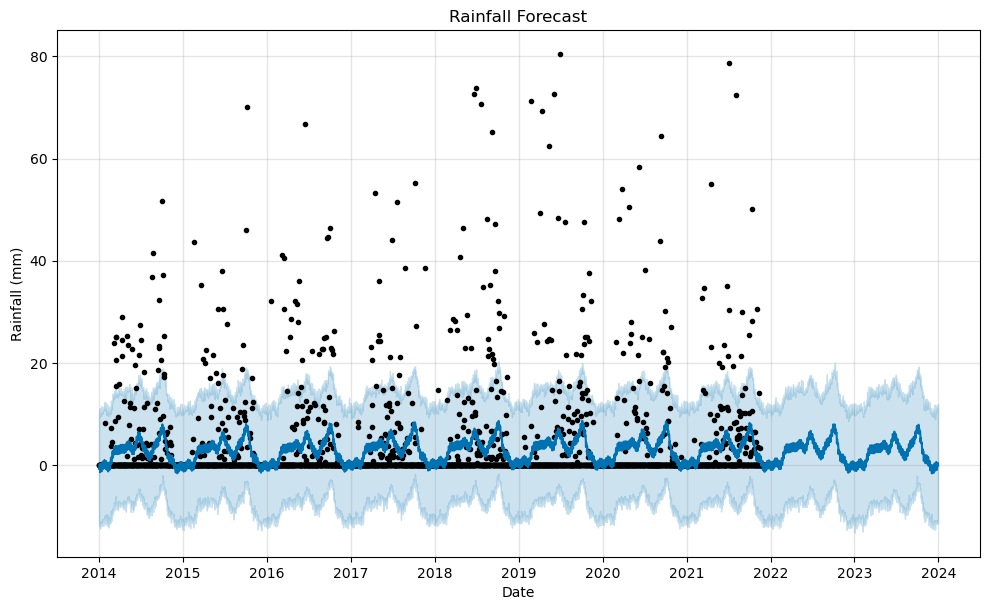

c:\Users\Kent\Anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Kent\Anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Kent\Anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

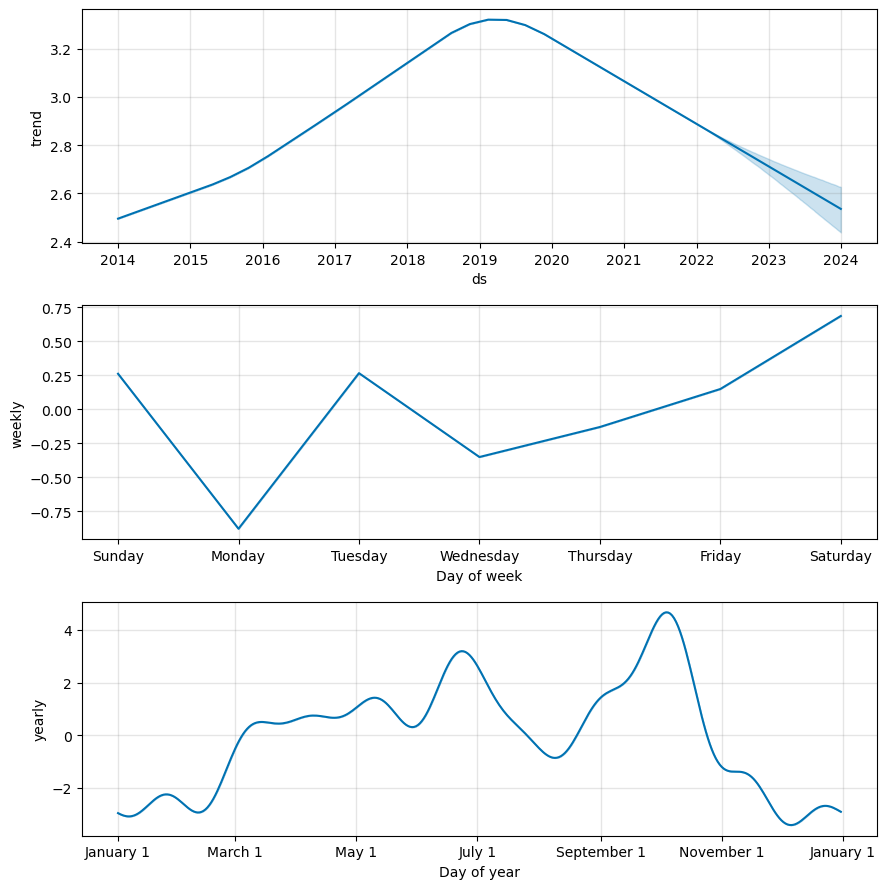

              y      yhat  yhat_lower  yhat_upper
ds                                               
2023-08-07  0.0  0.913267   -9.487143   12.608398
2023-08-08  0.0  2.027125   -9.134527   13.159721
2023-08-09  0.0  1.396220  -10.604454   12.941210
2023-08-10  0.0  1.615302   -8.491541   12.842519
2023-08-11  0.0  1.907642   -9.299746   13.094668
...         ...       ...         ...         ...
2023-12-27  0.0 -0.542469  -11.527234   11.039023
2023-12-28  0.0 -0.354570  -11.307164   11.405653
2023-12-29  0.0 -0.113441  -10.821965   10.394204
2023-12-30  0.0  0.381242  -10.937460   11.881164
2023-12-31  0.0 -0.086003  -11.485619   11.230858

[147 rows x 4 columns]


In [55]:
from prophet import Prophet

# Rename columns for Prophet
df = data.rename(columns={'DATE': 'ds', 'RAINFALL (mm)': 'y'})

# Split data into training (80%), testing (16%), and validation (4%) sets
train_size = 0.80
test_size = 0.16
validation_size = 0.04

train_end = int(train_size * len(df))
test_end = int((train_size + test_size) * len(df))

train_df = df.iloc[:train_end]
test_df = df.iloc[train_end:test_end]
validation_df = df.iloc[test_end:]

# Initialize and fit the Prophet model on the training set
model = Prophet ()
model.fit(train_df)

# Create a dataframe for future dates including the test and validation periods
future = model.make_future_dataframe(periods=len(test_df) + len(validation_df))

# Predict future values
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Rainfall Forecast')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.show()

# Plot trend and seasonality components
fig2 = model.plot_components(forecast)
plt.show()

# Evaluate the model on the validation set
# Adjusting to ensure correct slicing and concatenation
validation_forecast = forecast.iloc[-len(validation_df):]
validation_df = validation_df.set_index('ds')
validation_forecast = validation_forecast.set_index('ds')
validation_results = pd.concat([validation_df, validation_forecast[['yhat', 'yhat_lower', 'yhat_upper']]], axis=1)

# Print the validation results
print(validation_results[['y', 'yhat', 'yhat_lower', 'yhat_upper']])


In [70]:
#Baseline Model
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Compute MAE and RMSE metrics
mae = mean_absolute_error(validation_results['y'], validation_results['yhat'])
rmse = np.sqrt(mean_squared_error(validation_results['y'], validation_results['yhat']))

# Print the validation results and the metrics
print(validation_results[['y', 'yhat', 'yhat_lower', 'yhat_upper']])
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

              y      yhat  yhat_lower  yhat_upper
ds                                               
2023-08-07  0.0  0.913267   -9.487143   12.608398
2023-08-08  0.0  2.027125   -9.134527   13.159721
2023-08-09  0.0  1.396220  -10.604454   12.941210
2023-08-10  0.0  1.615302   -8.491541   12.842519
2023-08-11  0.0  1.907642   -9.299746   13.094668
...         ...       ...         ...         ...
2023-12-27  0.0 -0.542469  -11.527234   11.039023
2023-12-28  0.0 -0.354570  -11.307164   11.405653
2023-12-29  0.0 -0.113441  -10.821965   10.394204
2023-12-30  0.0  0.381242  -10.937460   11.881164
2023-12-31  0.0 -0.086003  -11.485619   11.230858

[147 rows x 4 columns]
Mean Absolute Error (MAE): 4.376276069759415
Root Mean Squared Error (RMSE): 8.271342493763285
